# Gradient Descent
### What is Gradient Descent?
- Gradient descent is an iterative optimization algorithm for finding the local minimum of a function.

- To find the local minimum of a function using gradient descent, we must take steps proportional to the negative of the gradient (move away from the gradient) of the function at the current point. If we take steps proportional to the positive of the gradient (moving towards the gradient), we will approach a local maximum of the function, and the procedure is called Gradient Ascent.

![alt text](https://editor.analyticsvidhya.com/uploads/631731_P7z2BKhd0R-9uyn9ThDasA.png)

### Learning Rate
- If the learning rate is too high, we might OVERSHOOT the minima and keep bouncing, without reaching the minima.

- If the learning rate is too small, the training might turn out to be too long.

![alt text](https://editor.analyticsvidhya.com/uploads/43266images.png)
- (a) This learning rate is good, our model convergres to the minimum.

- (b) Our learning rate is too small meaning that it takes more time but eventually converges to the minimum.

- (c) Our learning rate is higher than the optimal value so we are overshooting but it converges.

- (d) Learning rate is very large, it overshoots and diverges, moves away from the minima, performance decreases on learning.

![alt text](https://editor.analyticsvidhya.com/uploads/40982epochss.png)

Now lets begin to imppliment this learning algorithm on some data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [3]:
df =  pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Lets visualize our data on free sulfur dioxide(X) and total sulfure dioxide(y).

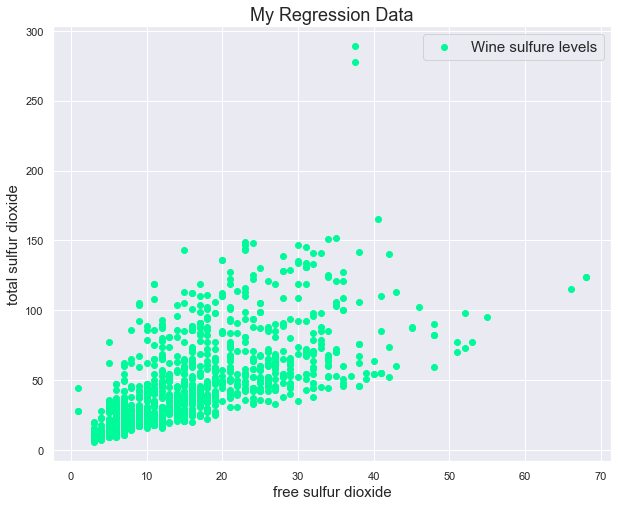

In [4]:
X = df["free sulfur dioxide"].values
y = df["total sulfur dioxide"].values

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "mediumspringgreen", label = "Wine sulfure levels")
plt.xlabel("free sulfur dioxide", fontsize = 15)
plt.ylabel("total sulfur dioxide", fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Now we have to make a couple functions:
our loss function: this will measure how good our prediction model does.
our gradL

[11. 25. 15. ... 32. 39. 32.]
[34. 67. 54. ... 44. 51. 44.]


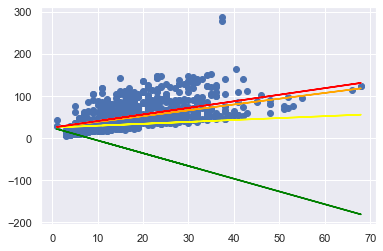

In [5]:
def loss(X, y, w, b):
    M = len(y)
    MSE_loss = sum(0.5*(x*w+b-y[i])**2 for i,x in enumerate(X))/M
    return MSE_loss

def gradL(X, y, w, b): 
    M = len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

def gradient_descent(X, y, w, b, alpha = 0.8, max_iter = 1_000):
    i = 0
    w_hist = [w]
    b_hist = [b]
    while i < max_iter:
        pdw, pdb = gradL(X, y, w, b)
        w = w - alpha * pdw
        b = b - alpha * pdb

        i += 1
        w_hist.append(w)
        b_hist.append(b)
        #print(pdw)
        #print(pdb)

    return w_hist, b_hist

W,B = gradient_descent(X, y, -5.0, 25.0 , alpha = 0.0001, max_iter=1000)

colors = {10: "green", 50: "yellow", 100: "orange", 200: "pink", 400: "red"}

for j in [10, 50, 100, 200, 400]:
    plt.plot(X, [W[j] * x + B[j] for x in X],color = colors[j])

plt.scatter(X, y)
#print(W)

#print(W[-1],B[-1])
# x = np.linspace(-6, 6, 100)
# y = np.linspace(-6, 6, 100)
# X, Y = np.meshgrid(x, y)
# Z = f(X, Y)


# fig = plt.figure(figsize = (10, 8))
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# for i in range(len(W)):
#     ax.scatter3D([W[i][0]], 
#                  [W[i][1]], 
#                  [f(W[i][0], W[i][1])], color = "blue")
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# ax.view_init(60, 35)
# plt.show()
print(X)
print(y)